In [1]:
# initialise
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

# HDB Resale Flat Prices

Data for this analysis was obtained from [here](https://data.gov.sg/dataset/resale-flat-prices).

The data set consists of transacted resale flat prices from the years 1990 to present (8 December 2022).

According to the data.gov website, prior to March 2012, data is based on date of approval for the resale transactions. For March 2012 onwards, the data is based on date of registration for the resale transactions.

Furthermore, data from 2015 onwards includes a column named `remaining_lease`, which indicates the remaining years of lease for the houses in the datasets.

For ease of analyses, I will limit my analyses to the years from 2015, which would already include at least 7 years of data and encompass several global and local events impacting the HDB resale market.

In [2]:
# import dataset

f1 = '/Users/iylia/Library/Mobile Documents/com~apple~CloudDocs/SP/Intro to Programming for DS/CA1/Data/Resale Flat Prices/resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv'
f2 = '/Users/iylia/Library/Mobile Documents/com~apple~CloudDocs/SP/Intro to Programming for DS/CA1/Data/Resale Flat Prices/resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv'

d1 = np.loadtxt(f1,
                delimiter=',',
                skiprows=1,
                usecols=(0,1,2,5,6,8,9,10),
                dtype=[('month', 'U50'),
                        ('town', 'U50'),
                        ('flat_type', 'U50'),
                        ('storey_range', 'U50'),
                        ('floor_area_sqm', 'f8'),
                        ('lease_commence_date', 'i8'),
                        ('remaining_lease', 'i8'),
                        ('resale_price', 'f8')]
               )

d2 = np.loadtxt(f2,
                delimiter=',',
                skiprows=1,
                usecols=(0,1,2,5,6,8,9,10),
                dtype=[('month', 'U50'),
                        ('town', 'U50'),
                        ('flat_type', 'U50'),
                        ('storey_range', 'U50'),
                        ('floor_area_sqm', 'f8'),
                        ('lease_commence_date', 'i8'),
                        ('remaining_lease', 'U50'),
                        ('resale_price', 'f8')]
               )

# change remaining_lease column in d2 to be integer of years without months
years = [i for i,j in np.char.split(d2['remaining_lease'],sep=' years')] # create list of years from split array string where i is the year, j is the rest of the string

d2['remaining_lease'] = np.array(years) # replace the remaining lease column in d2 to be integer of years without months

d2 = np.sort(d2, order='month')

# stack d1 and d2 into combined dataset
d = np.hstack((d1,d2))

# convert storey_range into categorical levels of low/mid/high
storeys = []
for i in d['storey_range']:
    if i in ("01 TO 03", "01 TO 05", "04 TO 06"):
        storeys.append("low")
    elif i in ("06 TO 10", "07 TO 09"):
        storeys.append("mid")
    else:
        storeys.append("high")

d['storey_range'] = np.array(storeys, dtype='U50')

# convert month column to MMM YYYY
months_list = [dt.strptime(date, '%Y-%m').date().strftime('%b %Y') for date in d['month']]
d['month'] = months_list

In [3]:
# simple text analysis
print('{:*^26}'.format(' Resale Flat Prices '))
print()
print(f'There are {len(d)} rows and 8 columns in this dataset')
print()
# view first 10 rows of full dataset
print('View the first 10 rows of the full dataset')
print()
print(d[:10])
print()
print(f'The names of the columns are:')
print(f'- month <class {d.dtype[0]}> isnumeric: {np.unique(np.char.isnumeric(d["month"]))}')
print(f'- town <class {d.dtype[1]}> isnumeric: {np.unique(np.char.isnumeric(d["town"]))}')
print(f'- flat_type <class {d.dtype[2]}> isnumeric: {np.unique(np.char.isnumeric(d["flat_type"]))}')
print(f'- storey_range <class {d.dtype[3]}> isnumeric: {np.unique(np.char.isnumeric(d["storey_range"]))}')
print(f'- floor_area_sqm <class {d.dtype[4]}>')
print(f'- lease_commence_date <class {d.dtype[5]}>')
print(f'- remaining_lease <class {d.dtype[6]}> isnumeric: {np.unique(np.char.isnumeric(d["remaining_lease"]))}')
print(f'- resale_price <class {d.dtype[7]}>')
print()
print(f'{len(np.unique(d["month"]))} unique values in month column')
print(f'{len(np.unique(d["town"]))} unique values in town column')
print(f'{len(np.unique(d["flat_type"]))} unique values in flat_type column')
print(f'{len(np.unique(d["storey_range"]))} unique values in storey_range column')
print(f'{len(np.unique(d["floor_area_sqm"]))} unique values in floor_area_sqm column')
print(f'{len(np.unique(d["lease_commence_date"]))} unique values in lease_commence_date column')
print(f'{len(np.unique(d["remaining_lease"]))} unique values in remaining_lease column')
print(f'{len(np.unique(d["resale_price"]))} unique values in resale_price column')

*** Resale Flat Prices ***

There are 178825 rows and 8 columns in this dataset

View the first 10 rows of the full dataset

[('Jan 2015', 'ANG MO KIO', '3 ROOM', 'mid', 60., 1986, '70', 255000.)
 ('Jan 2015', 'ANG MO KIO', '3 ROOM', 'low', 68., 1981, '65', 275000.)
 ('Jan 2015', 'ANG MO KIO', '3 ROOM', 'low', 69., 1980, '64', 285000.)
 ('Jan 2015', 'ANG MO KIO', '3 ROOM', 'low', 68., 1979, '63', 290000.)
 ('Jan 2015', 'ANG MO KIO', '3 ROOM', 'mid', 68., 1980, '64', 290000.)
 ('Jan 2015', 'ANG MO KIO', '3 ROOM', 'mid', 67., 1980, '64', 290000.)
 ('Jan 2015', 'ANG MO KIO', '3 ROOM', 'low', 68., 1980, '64', 290000.)
 ('Jan 2015', 'ANG MO KIO', '3 ROOM', 'low', 68., 1981, '65', 293000.)
 ('Jan 2015', 'ANG MO KIO', '3 ROOM', 'low', 67., 1978, '62', 300000.)
 ('Jan 2015', 'ANG MO KIO', '3 ROOM', 'high', 68., 1985, '69', 307500.)]

The names of the columns are:
- month <class <U50> isnumeric: [False]
- town <class <U50> isnumeric: [False]
- flat_type <class <U50> isnumeric: [False]
- storey_

## Exploratory Data Analysis 1

Now that the dataset has been imported and combined, with the data types known, we can do some quick exploratory analyses.

First, we know that generally, HDB flat prices tend to vary by flat types. We can visualise this in a boxplot:

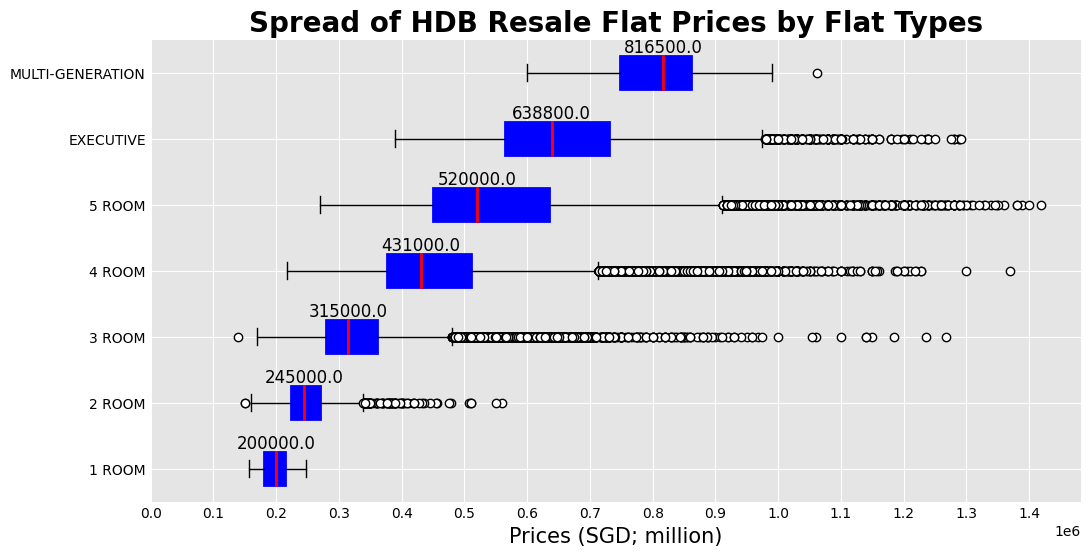

In [4]:
# get unique labels for flat type
labels = list(set(d['flat_type']))
labels.sort()
types = np.arange(0,len(labels))
types_prices = d[['flat_type', 'resale_price']]

# create array for boxplot
prices = types_prices['resale_price']

prices_combined = [prices[types_prices['flat_type'] == i] for i in labels]

# plot
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()

bp_dict = ax.boxplot(prices_combined,
            labels=labels,
            patch_artist=True,
            medianprops={"color": "red", "linewidth": 2},
            boxprops={"facecolor": "blue", "color": "blue",
                          "linewidth": 2},
            flierprops={"markerfacecolor": "white"},
            vert=False)

ax.set_title('Spread of HDB Resale Flat Prices by Flat Types', fontsize=20, fontweight='bold')
ax.set_xlabel('Prices (SGD; million)',fontsize=15)
ax.set_xticks(np.arange(0,1500000,100000))

# remove plot borders
ax.spines[:].set_visible(False) #use open slice to address all spines

# remove axis tick markers
ax.tick_params(length=0)

# add gridlines
ax.grid(color='w')
ax.set_facecolor('#e5e5e5')

for line in bp_dict['medians']:
    # get position data for median line
    x, y = line.get_xydata()[1] # top of median line
    # overlay median value
    plt.text(x, y, '%.1f' % x,
         verticalalignment='bottom',horizontalalignment='center',fontsize=12) # draw above median line, centered

plt.show()

From the boxplot above, we can see that for resale flat prices in 2015 to present, the larger flat types do see higher median prices than those of smaller types. We can also see that the larger flat types, from 3-room and above, even for some 2-room flats, the resale prices tend to be right-skewed with many outliers in the higher range of prices. 

Considering recent news of HDB resale flat prices increasing, and even hitting SGD 1 million, this could be the reason for the skewness and existence of many outliers. Nevertheless, we can investigate this further by examining the trend of mean HDB resale flat prices across the time period, for each flat type. This will be analysed next.

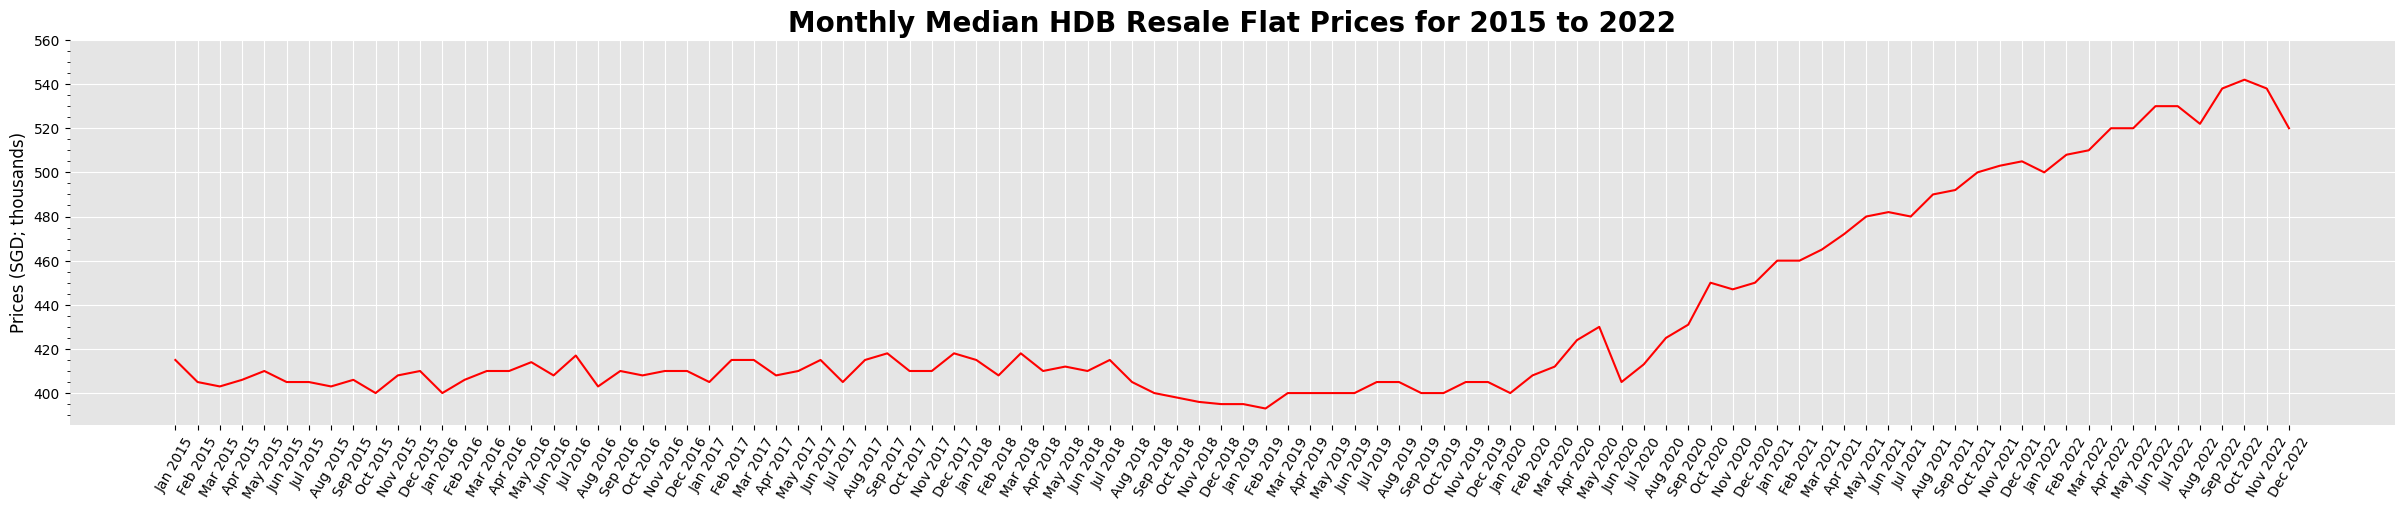

In [5]:
# get unique labels for month and year of sale
labels = list(np.unique(d['month']))
# print(labels)
months = np.arange(0,len(labels))
months_prices = d[['month', 'resale_price']]

# get order of labels based on original array
labels_order = np.unique(d['month'], return_index=True)[1]
labels_ordered = [d['month'][label] for label in sorted(labels_order)]

# create array for line chart of median prices per month from 2015 to 2022
prices = months_prices['resale_price']

prices_median = [np.around(np.median(prices[months_prices['month'] == i])/1000) for i in labels_ordered]

month_prices_median = np.array(list(zip(labels_ordered,prices_median))).reshape((96,2))
# print(month_prices_median)

# plot
fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot()

ax.plot(month_prices_median[:,0], month_prices_median[:,1].astype(float), color='red') # prices were saved as str when zipping so need to convert to float
ax.tick_params(axis='x', labelrotation = 60)
ax.set_yticks(np.arange(400,580,20))
ax.yaxis.set_minor_locator(MultipleLocator(5))

# remove plot borders
ax.spines[:].set_visible(False) #use open slice to address all spines

# add gridlines
ax.grid(color='w')
ax.set_facecolor('#e5e5e5')

ax.set_title('Monthly Median HDB Resale Flat Prices for 2015 to 2022',fontsize=20, fontweight='bold')
ax.set_ylabel('Prices (SGD; thousands)', fontsize = 12)

plt.show()

The time series chart shows that HDB resale flat prices have indeed risen over the past few years, with the largest jump occurring from June 2020 onwards, right after the Circuit Breaker period.

    - Note that median was used in the time series chart as the boxplots above showed that the prices data were skewed.

Despite the COVID-19 pandemic causing a recession and inflationary pressures, the increase in resale flat prices can be attributed to increased demand as many individuals or couples sought to get a place of their own after experiencing isolation at home during the Circuit Breaker and ensuing phases introduced by the MMTF in managing the pandemic. This was despite the sharp dip in May 2020, the Circuit Breaker period where most people could not go house-hunting.

Furthermore, the fall in prices seen towards the end of 2021 and 2022 could be attributed to [property cooling measures](https://www.99.co/singapore/insider/new-property-cooling-measures-2022/) introduced by HDB in December 2021 and October 2022 respectively.

However, this visualisation leaves us with 2 questions:

    1. Do the changes in prices correspond with increased volume of transacted resale flats? (i.e., more resale flats exchanging hands)
    2. Are the changes in prices the same across the flat types?

These will be examined next.

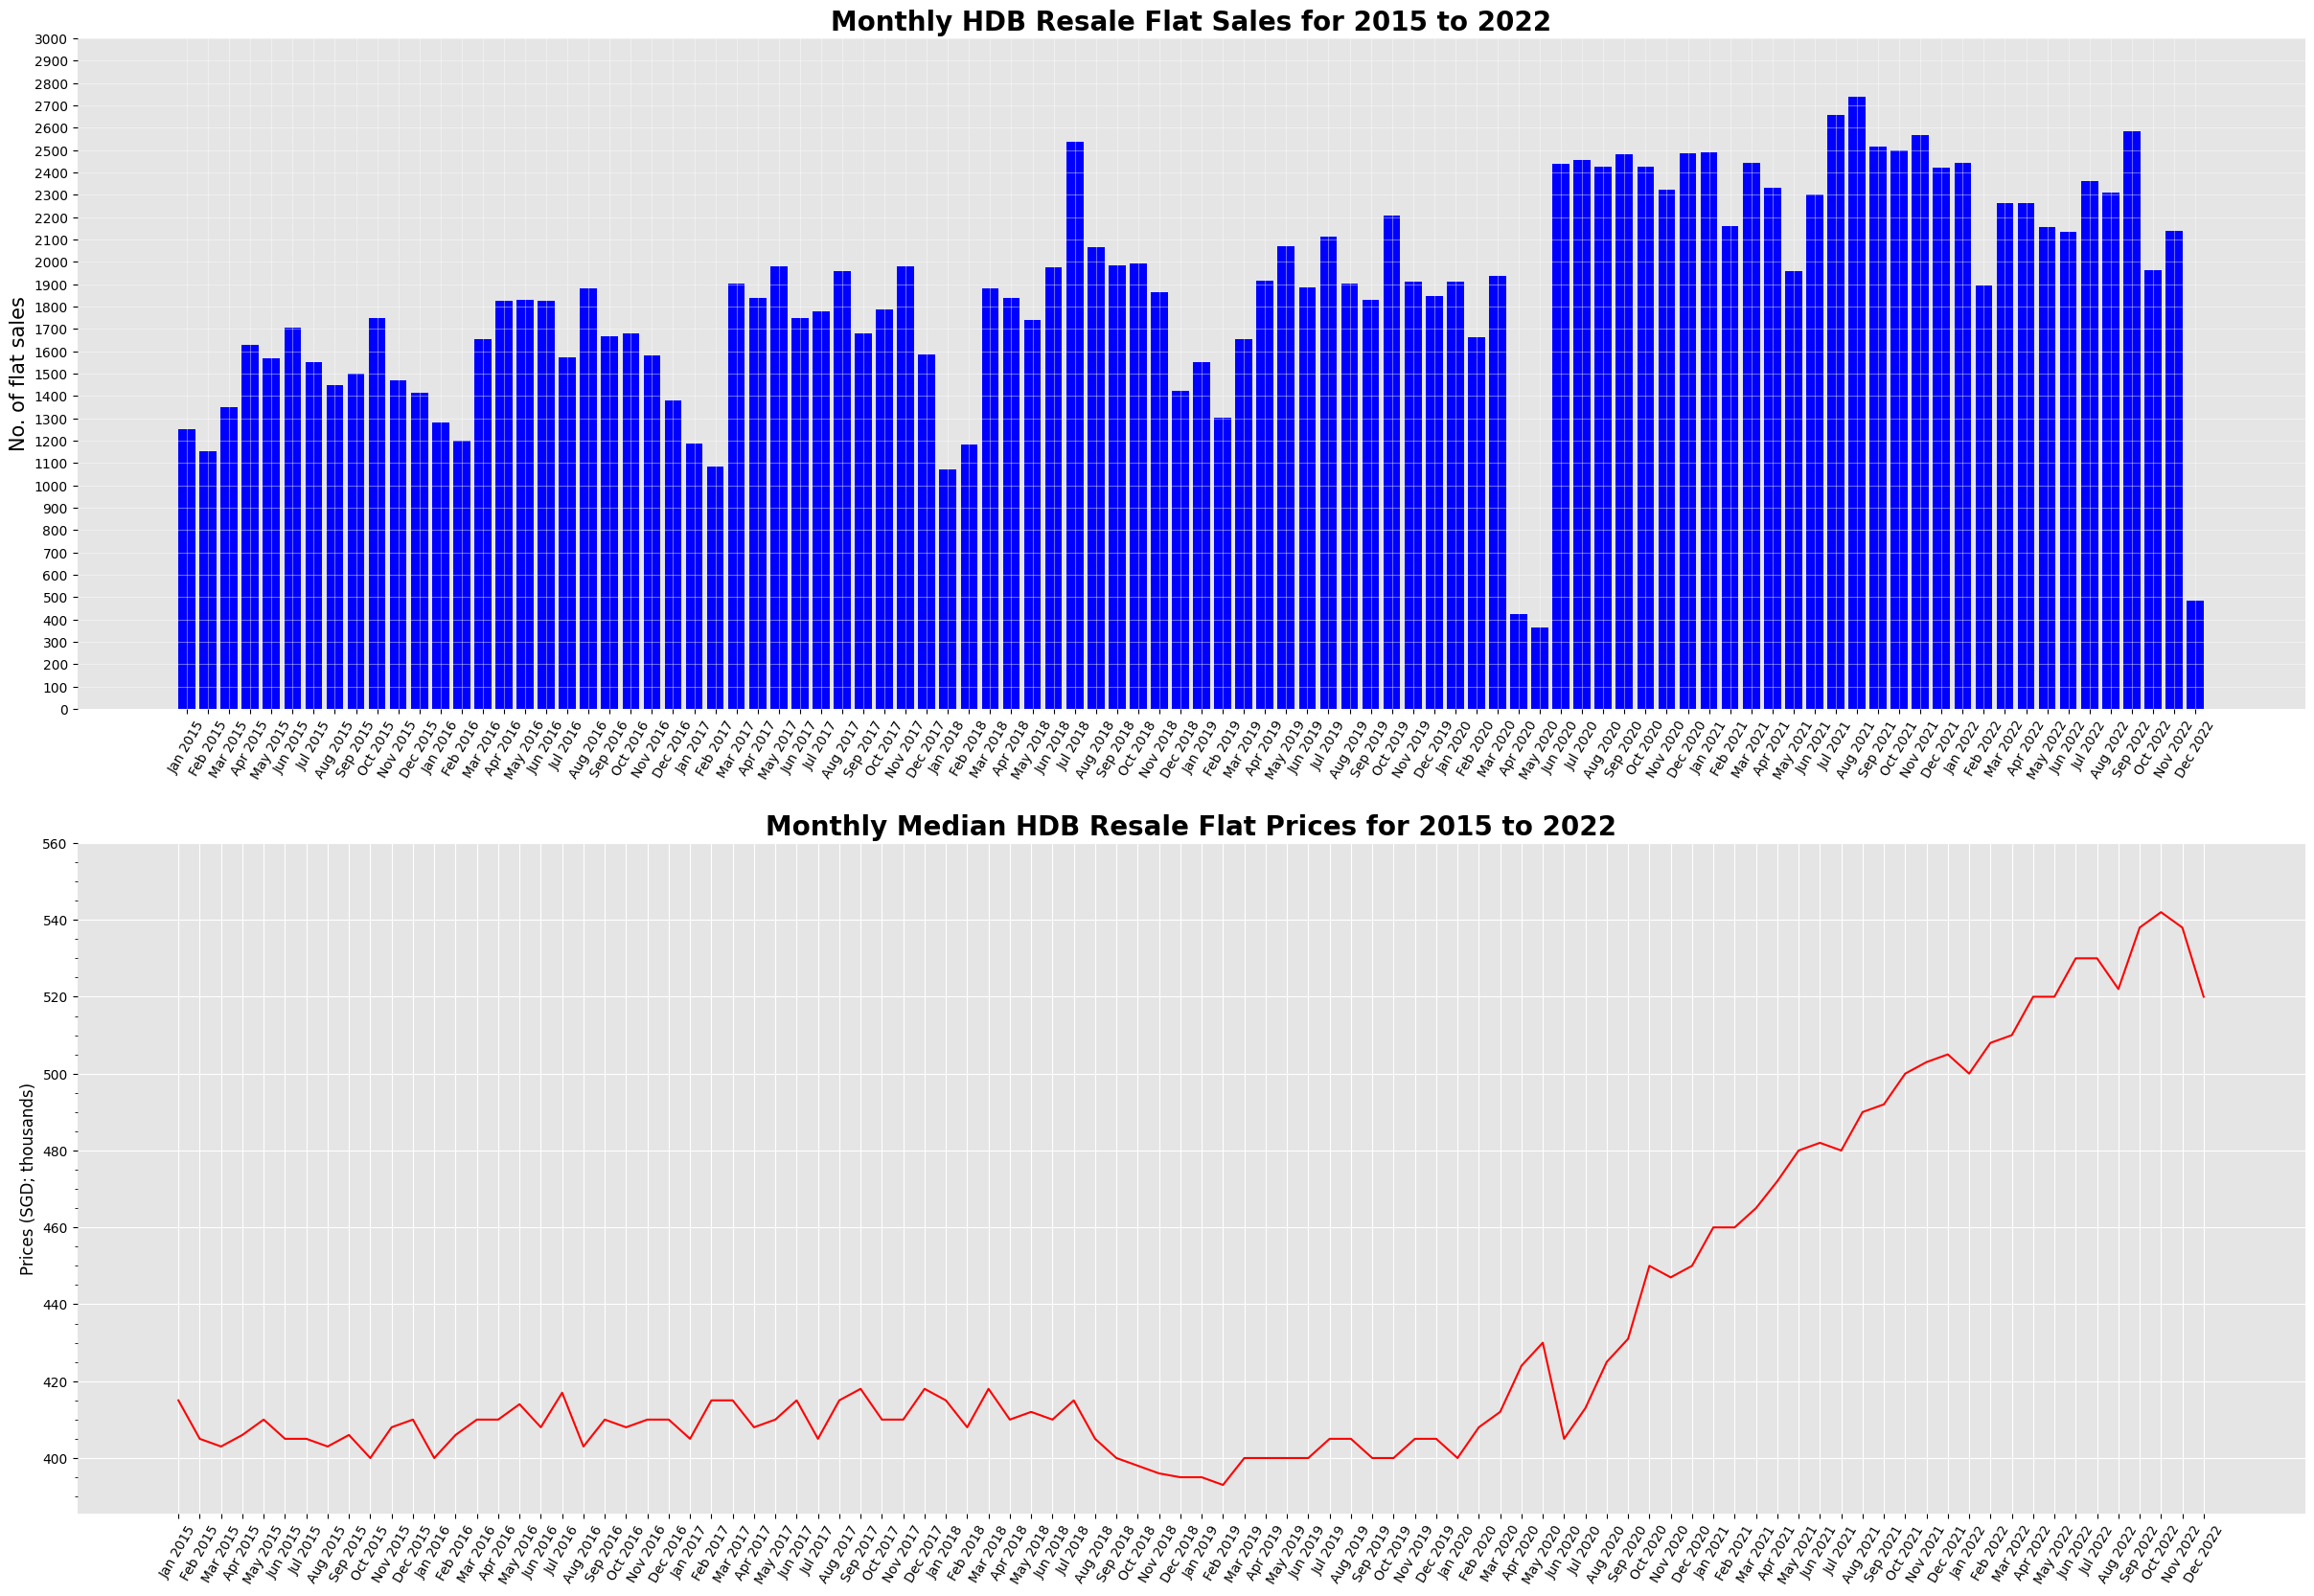

In [6]:
# get unique labels for month and year of sale
labels = list(np.unique(d['month']))
# print(labels)
months = np.arange(0,len(labels))
months_prices = d[['month', 'resale_price']]

# get order of labels based on original array
labels_order = np.unique(d['month'], return_index=True)[1]
labels_ordered = [d['month'][label] for label in sorted(labels_order)]

# create array for bar chart of flat sales per month from 2015 to 2022
prices = months_prices['resale_price']

count_sales = [len(prices[months_prices['month'] == i]) for i in labels_ordered]

month_count_sales = np.array(list(zip(labels_ordered,count_sales))).reshape((96,2))
# print(month_count_sales)

# plot
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(211)

ax1.bar(month_count_sales[:,0], month_count_sales[:,1].astype(int), color='blue') # prices were saved as str when zipping so need to convert to float
ax1.tick_params(axis='x', labelrotation = 60)
ax1.set_yticks(np.arange(0,3100,100))

# remove plot borders
ax1.spines[:].set_visible(False) #use open slice to address all spines

# add gridlines
ax1.grid(color='w', alpha=0.4)
ax1.set_facecolor('#e5e5e5')

ax1.set_title('Monthly HDB Resale Flat Sales for 2015 to 2022',fontsize=20, fontweight='bold')
ax1.set_ylabel('No. of flat sales', fontsize = 15)

# create array for line chart of median prices per month from 2015 to 2022
prices = months_prices['resale_price']

prices_median = [np.around(np.median(prices[months_prices['month'] == i])/1000) for i in labels_ordered]

month_prices_median = np.array(list(zip(labels_ordered,prices_median))).reshape((96,2))
# print(month_prices_median)

# plot
ax2 = fig.add_subplot(212)

ax2.plot(month_prices_median[:,0], month_prices_median[:,1].astype(float), color='red') # prices were saved as str when zipping so need to convert to float
ax2.tick_params(axis='x', labelrotation = 60)
ax2.set_yticks(np.arange(400,580,20))
ax2.yaxis.set_minor_locator(MultipleLocator(5))

# remove plot borders
ax2.spines[:].set_visible(False) #use open slice to address all spines

# add gridlines
ax2.grid(color='w')
ax2.set_facecolor('#e5e5e5')

ax2.set_title('Monthly Median HDB Resale Flat Prices for 2015 to 2022',fontsize=20, fontweight='bold')
ax2.set_ylabel('Prices (SGD; thousands)', fontsize = 12)

plt.show()

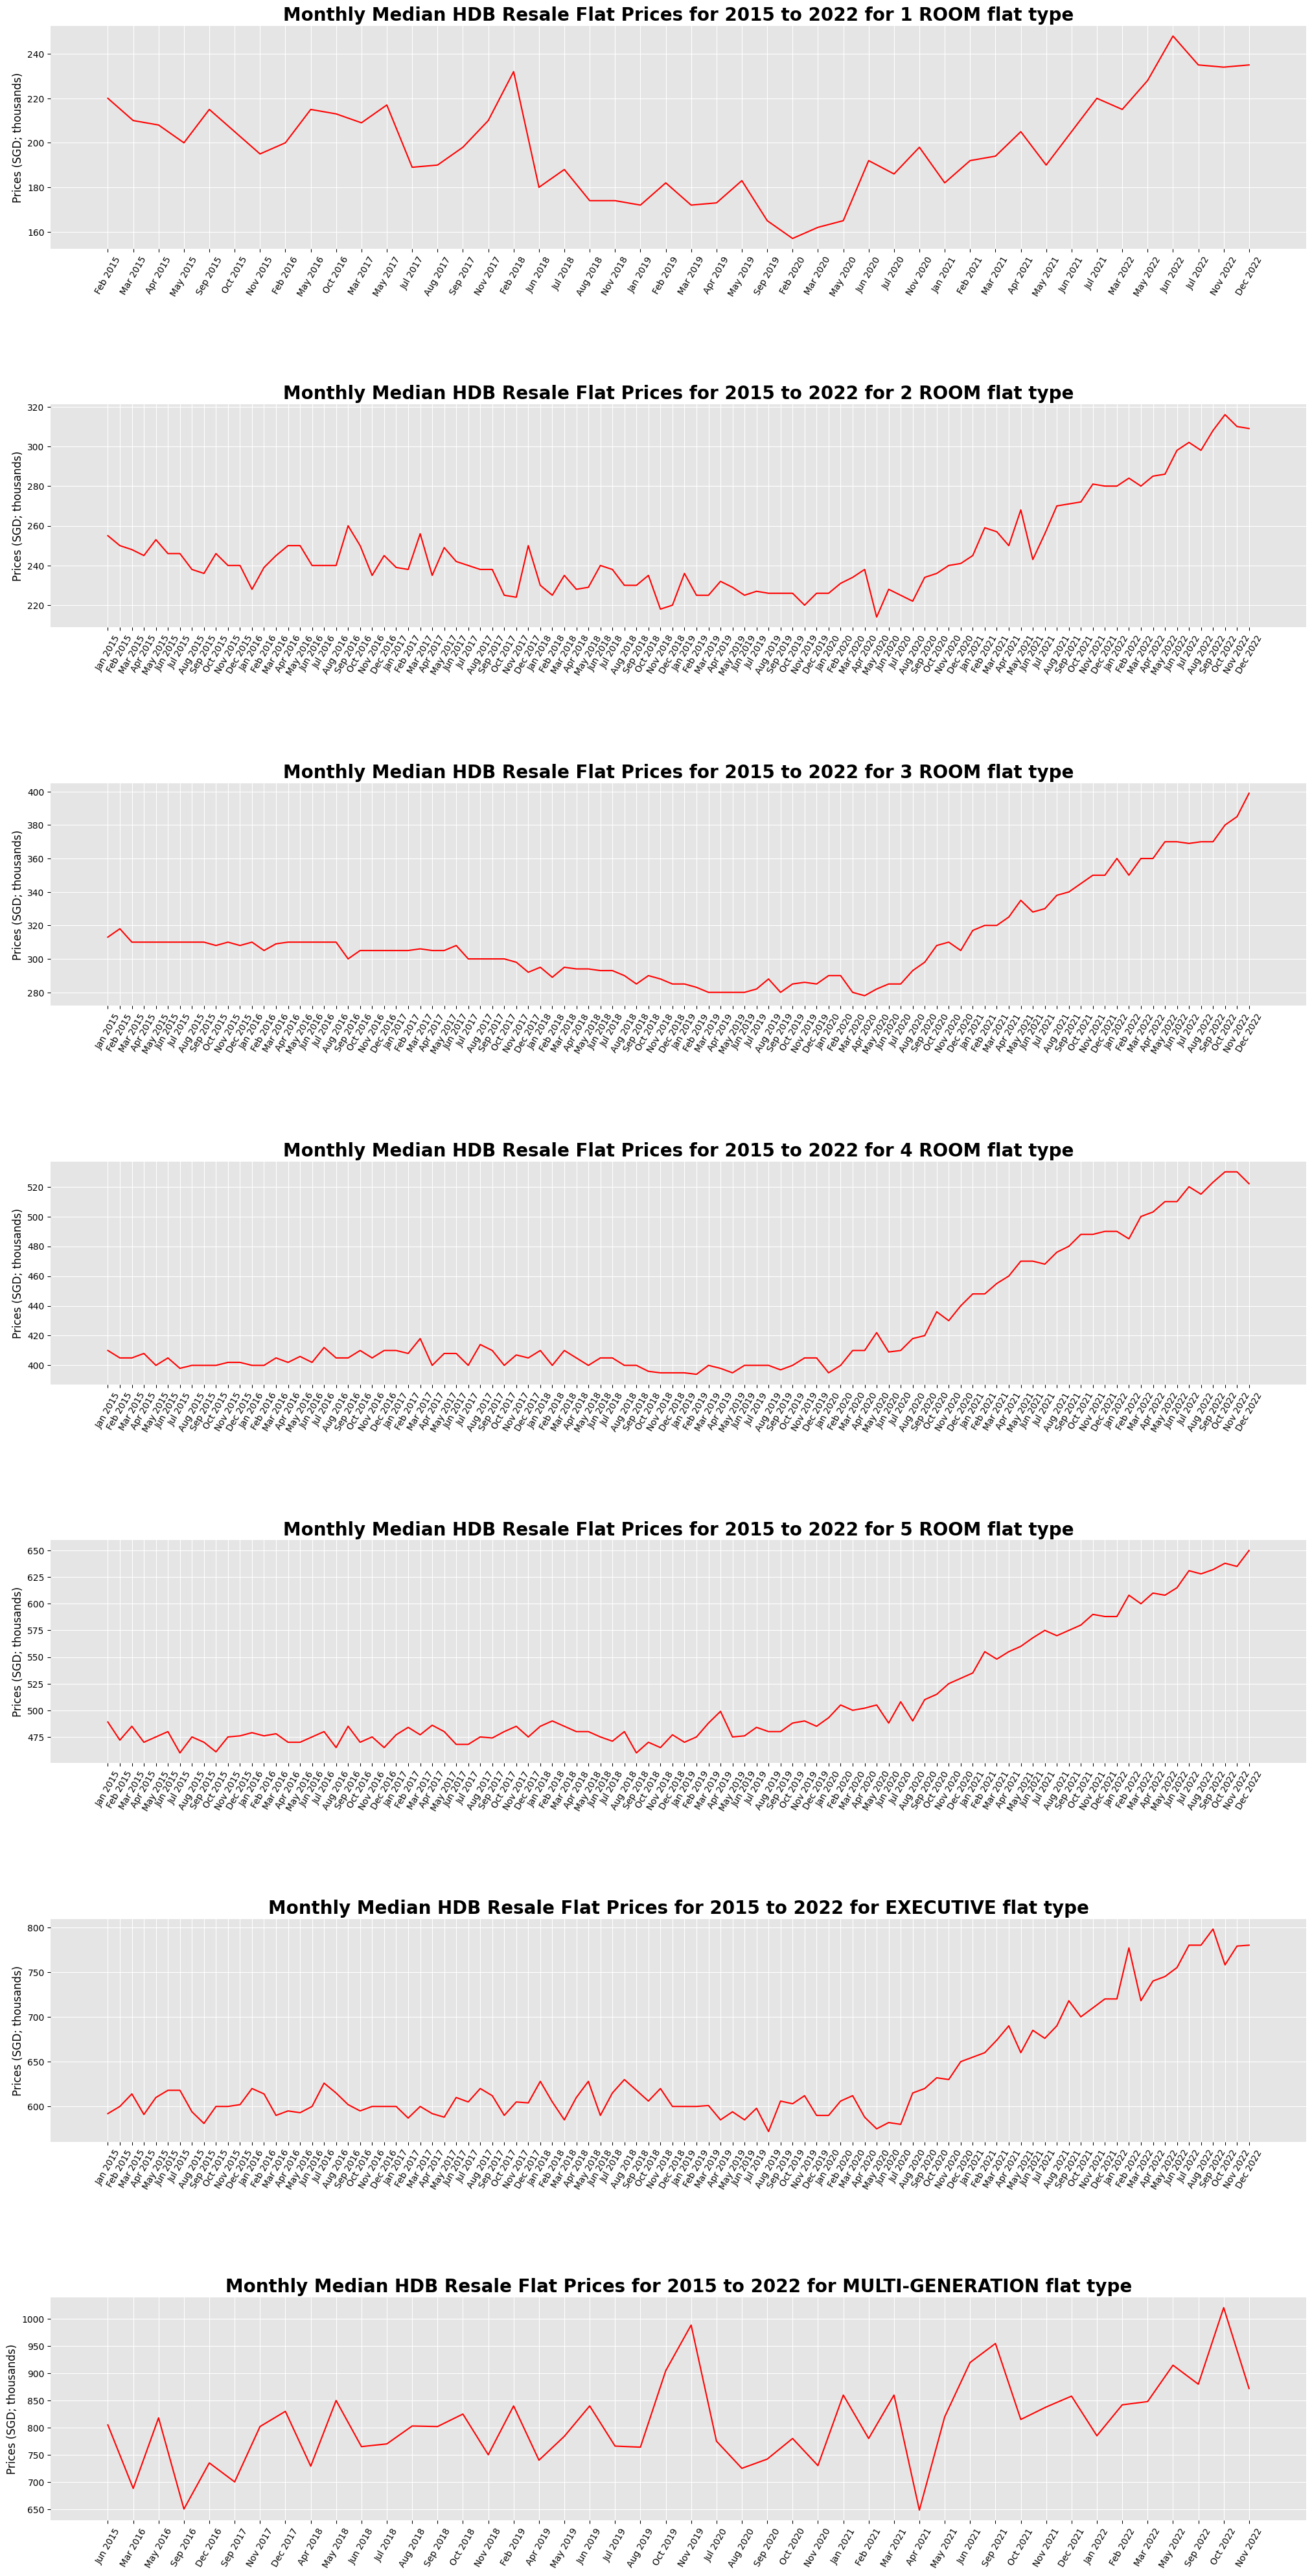

In [7]:
months_prices = d[['month', 'resale_price']]

# function to create sets of arrays for each flat type
def monthPriceFlatType(data,flattype):
    a = data[d['flat_type'] == flattype]
    
    return a

'''
months_type_prices1 = months_prices[d['flat_type'] == '1 ROOM']
months_type_prices2 = months_prices[d['flat_type'] == '2 ROOM']
months_type_prices3 = months_prices[d['flat_type'] == '3 ROOM']
months_type_prices4 = months_prices[d['flat_type'] == '4 ROOM']
months_type_prices5 = months_prices[d['flat_type'] == '5 ROOM']
months_type_prices6 = months_prices[d['flat_type'] == 'EXECUTIVE']
months_type_prices7 = months_prices[d['flat_type'] == 'MULTI-GENERATION']
'''

# function to create pivot table of median values with months for each flattype
def createMedianPivot(data,flattype):
    b = monthPriceFlatType(data,flattype)
    
    # get order of labels based on original array
    # get unique labels for month and year of sale
    labels = list(np.unique(b['month']))
    # print(labels)
    labels_order = np.unique(b['month'], return_index=True)[1]
    labels_ordered = [b['month'][label] for label in sorted(labels_order)]

    # create array for line chart of median prices per month from 2015 to 2022
    prices = b['resale_price']

    prices_median = [np.around(np.median(prices[b['month'] == i])/1000) for i in labels_ordered]

    month_prices_median = np.array(list(zip(labels_ordered,prices_median))).reshape((len(labels_ordered),2))

    return month_prices_median

def subplotsline(data,flattype,ax):
    c = createMedianPivot(data,flattype)
    months = c[:,0]
    prices = c[:,1]

    try:
        ax.plot(months, prices.astype(float), color='red') # prices were saved as str when zipping so need to convert to float
        ax.tick_params(axis='x', labelrotation = 60)
        # ax.set_yticks(np.arange(round(prices.astype(float).min()-100),round(prices.astype(float).min()+100),20))
        # ax.yaxis.set_minor_locator(MultipleLocator(10))

        # remove plot borders
        ax.spines[:].set_visible(False) #use open slice to address all spines

        # add gridlines
        ax.grid(color='w')
        ax.set_facecolor('#e5e5e5')

        ax.set_title(f'Monthly Median HDB Resale Flat Prices for 2015 to 2022 for {flattype} flat type',fontsize=20, fontweight='bold')
        ax.set_ylabel('Prices (SGD; thousands)', fontsize = 12)
    
    except:
        print("Failed to create subplots")

fig, axes = plt.subplots(7,1,figsize=(25,50))
axes = axes.flatten()

# https://stackoverflow.com/questions/68720116/creating-subplots-with-a-function-and-loop

axes_type = np.array(list(zip(np.unique(d['flat_type']),axes)))

fig.subplots_adjust(hspace=0.7)

for type, ax in axes_type:
    subplotsline(months_prices,type,ax)

plt.show()

We can see that for the Circuit Breaker period, the overall median resale price drop was linked to a large drop in volume of HDB resale flats sold. Additionally, most HDB resale flat transactions took place within Feb - November, with a typical fall in resale flat transactions at the beginning and end of years. 

More importantly, the volume of resale flats sold was quite consistently higher *after* the Circuit Breaker period than before, with prices for resale `2`,`3`,`4`,`5 ROOM` and `EXECUTIVE` flat types increasing significantly more than their median prices before the Circuit Breaker period, which can be known as the peak of the COVID-19 pandemic in Singapore.

Between flat types, the `1 ROOM` and `MULTI-GENERATION` flat types showed the most variability in resale prices over the period of 2015 to 2022. I will remove these flat types from further analyses for ease of analysis.

These findings raise the following questions:

    1. Was the increase in resale flat prices and volume after the Circuit Breaker period linked to increased demand for housing in Singapore?
    2. Was the increase in resale flat prices and volume similar to bookings of new flats (e.g., BTO, DBSS, etc.) within the same period?

# Completion Status of HDB Residential Developments and Resale Price Index

To attempt to answer the first question above, I will explore the datasets for the [completion status of HDB Residential Developments](https://data.gov.sg/dataset/number-of-units-of-hdb-developments-by-status), which includes all new properties under HDB, and the [HDB Resale Price Index](https://data.gov.sg/dataset/hdb-resale-price-index), which compares overall price movements of HDB reslae flats across towns, flat types, and models.

In [8]:
# import dataset

f3 = '/Users/iylia/Library/Mobile Documents/com~apple~CloudDocs/SP/Intro to Programming for DS/CA1/Data/Completion Status of HDB Developments/completion-status-of-hdb-residential-developments.csv'
f4 = '/Users/iylia/Library/Mobile Documents/com~apple~CloudDocs/SP/Intro to Programming for DS/CA1/Data/HDB Resale Price Index/housing-and-development-board-resale-price-index-1q2009-100-quarterly.csv'

comp_stat = np.genfromtxt(f3,
                        delimiter=',',
                        skip_header=1,
                        dtype=[('year', 'i8'),
                                ('type', 'U50'),
                                ('status', 'U50'),
                                ('no_of_units', 'i8')],
                        missing_values="na",
                        filling_values=0 # missing values filled with 0 for ease of analysis (might not be the best option but the most efficient for now)
                        )

resale_index_raw = np.genfromtxt(f4,
                        delimiter=',',
                        skip_header=1,
                        dtype=[('quarter', 'U50'),
                                ('index', 'f8')]
                        )

In [9]:
# simple text analysis
print('{:*^57}'.format(' Completion Status of HDB Residential Developments '))
print()
print(f'There are {len(comp_stat)} rows and 5 columns in this dataset')
print()
# view first 10 rows of full dataset
print('View the first and last 10 rows of the full dataset')
print()
print(comp_stat[:10])
print()
print(comp_stat[-10:])
print()
print(f'The names of the columns are:')
print(f'- year <class {comp_stat.dtype[0]}>')
print(f'- type <class {comp_stat.dtype[1]}> isnumeric: {np.unique(np.char.isnumeric(comp_stat["type"]))}')
print(f'- status <class {comp_stat.dtype[2]}> isnumeric: {np.unique(np.char.isnumeric(comp_stat["status"]))}')
print(f'- no_of_units <class {comp_stat.dtype[3]}>')
print()
print(f'{len(np.unique(comp_stat["year"]))} unique values in year column')
print(f'{len(np.unique(comp_stat["type"]))} unique values in type column')
print(f'{len(np.unique(comp_stat["status"]))} unique values in status column')
print(f'{len(np.unique(comp_stat["no_of_units"]))} unique values in no_of_units column')

*** Completion Status of HDB Residential Developments ***

There are 75 rows and 5 columns in this dataset

View the first and last 10 rows of the full dataset

[(2007, 'HDB Flats', 'Completed',  6247)
 (2007, 'HDB Flats', 'Under Construction', 18073)
 (2007, 'HDB Flats', 'Awarded', 10108) (2007, 'DBSS', 'Completed',     0)
 (2007, 'DBSS', 'Under Construction',     0)
 (2008, 'HDB Flats', 'Completed',  1769)
 (2008, 'HDB Flats', 'Under Construction', 31058)
 (2008, 'HDB Flats', 'Awarded', 14754) (2008, 'DBSS', 'Completed',     0)
 (2008, 'DBSS', 'Under Construction',     0)]

[(2020, 'HDB Flats', 'Completed',  8234)
 (2020, 'HDB Flats', 'Under Construction', 75322)
 (2020, 'HDB Flats', 'Awarded', 10003) (2020, 'DBSS', 'Completed',     0)
 (2020, 'DBSS', 'Under Construction',     0)
 (2021, 'HDB Flats', 'Completed', 13627)
 (2021, 'HDB Flats', 'Under Construction', 82987)
 (2021, 'HDB Flats', 'Awarded', 23375) (2021, 'DBSS', 'Completed',     0)
 (2021, 'DBSS', 'Under Construction',     

In [10]:
# simple text analysis
print('{:*^26}'.format(' Resale Price Index '))
print()
print(f'There are {len(resale_index_raw)} rows and 2 columns in this dataset')
print()
# view first 10 rows of full dataset
print('View the first and last 10 rows of the full dataset')
print()
print(resale_index_raw[:10])
print()
print(resale_index_raw[-10:])
print()
print(f'The names of the columns are:')
print(f'- quarter <class {resale_index_raw.dtype[0]}> isnumeric: {np.unique(np.char.isnumeric(resale_index_raw["quarter"]))}')
print(f'- index <class {resale_index_raw.dtype[1]}>')
print()
print(f'{len(np.unique(resale_index_raw["quarter"]))} unique values in quarter column')
print(f'{len(np.unique(resale_index_raw["index"]))} unique values in index column')

*** Resale Price Index ***

There are 127 rows and 2 columns in this dataset

View the first and last 10 rows of the full dataset

[('1990-Q1', 24.3) ('1990-Q2', 24.4) ('1990-Q3', 25. ) ('1990-Q4', 24.7)
 ('1991-Q1', 24.9) ('1991-Q2', 25.5) ('1991-Q3', 25.2) ('1991-Q4', 25.1)
 ('1992-Q1', 25.8) ('1992-Q2', 27.4)]

[('2019-Q2', 130.8) ('2019-Q3', 130.9) ('2019-Q4', 131.5)
 ('2020-Q1', 131.5) ('2020-Q2', 131.9) ('2020-Q3', 133.9)
 ('2020-Q4', 138.1) ('2021-Q1', 142.2) ('2021-Q2', 146.4)
 ('2021-Q3', 150.6)]

The names of the columns are:
- quarter <class <U50> isnumeric: [False]
- index <class float64>

127 unique values in quarter column
113 unique values in index column


In [11]:
# in resale_index_raw, split quarter column into two columns of year and quarter
quarter = [j for i,j in np.char.split(resale_index_raw['quarter'],sep='-')]

# new column for years
year = [i for i,j in np.char.split(resale_index_raw['quarter'],sep='-')]

# https://stackoverflow.com/questions/31172991/typeerror-invalid-type-promotion-when-appending-to-a-heterogeneous-numpy-arra
# https://numpy.org/doc/stable/reference/generated/numpy.array.html
# convert zipped data into list then create final array with new column and replace quarter column from raw dataset

resale_index = np.array(list(zip(quarter,resale_index_raw['index'],year)),
                        dtype=[('quarter', 'U50'),
                                ('index', 'f8'),
                                ('year', 'i8')]
                        )

In [12]:
# simple text analysis
print('{:*^26}'.format(' Resale Price Index '))
print()
print(f'There are {len(resale_index)} rows and 3 columns in this dataset')
print()
# view first 10 rows of full dataset
print('View the first and last 10 rows of the full dataset')
print()
print(resale_index[:10])
print()
print(resale_index[-10:])
print()
print(f'The names of the columns are:')
print(f'- quarter <class {resale_index.dtype[0]}> isnumeric: {np.unique(np.char.isnumeric(resale_index["quarter"]))}')
print(f'- index <class {resale_index.dtype[1]}>')
print(f'- year <class {resale_index.dtype[2]}>')
print()
print(f'{len(np.unique(resale_index["quarter"]))} unique values in quarter column')
print(f'{len(np.unique(resale_index["index"]))} unique values in index column')
print(f'{len(np.unique(resale_index["year"]))} unique values in year column')

*** Resale Price Index ***

There are 127 rows and 3 columns in this dataset

View the first and last 10 rows of the full dataset

[('Q1', 24.3, 1990) ('Q2', 24.4, 1990) ('Q3', 25. , 1990)
 ('Q4', 24.7, 1990) ('Q1', 24.9, 1991) ('Q2', 25.5, 1991)
 ('Q3', 25.2, 1991) ('Q4', 25.1, 1991) ('Q1', 25.8, 1992)
 ('Q2', 27.4, 1992)]

[('Q2', 130.8, 2019) ('Q3', 130.9, 2019) ('Q4', 131.5, 2019)
 ('Q1', 131.5, 2020) ('Q2', 131.9, 2020) ('Q3', 133.9, 2020)
 ('Q4', 138.1, 2020) ('Q1', 142.2, 2021) ('Q2', 146.4, 2021)
 ('Q3', 150.6, 2021)]

The names of the columns are:
- quarter <class <U50> isnumeric: [False]
- index <class float64>
- year <class int64>

4 unique values in quarter column
113 unique values in index column
32 unique values in year column


## Exploratory Data Analysis 2

Now that the dataset has been imported and combined, with the data types known, we can do some quick exploratory analyses to answer the first question: Was the increase in resale flat prices and volume after the Circuit Breaker period linked to the completion status of new HDB developments?

The data on the status of HDB develpments accounts for all types of sold flats under HDB, including BTO and DBSS flats. Since the DBSS scheme ended in 2011, these are not included in the timeframe of 2015 to 2022. I expect that the completion status and award of HDB development tenders would be linked to the volume of resale flats sold during the same period and thus influencing its prices.

Additionally, the resale price index data can be compared to the median HDB resale flat price chart from the first dataset to determine if there were similarities.


In [13]:
# in d, split month column into two columns of month and year
year = [j for i,j in np.char.split(d['month'],sep=' ')]

# new column for years
month = [i for i,j in np.char.split(d['month'],sep=' ')]

# https://stackoverflow.com/questions/31172991/typeerror-invalid-type-promotion-when-appending-to-a-heterogeneous-numpy-arra
# https://numpy.org/doc/stable/reference/generated/numpy.array.html
# convert zipped data into list then create final array with new column and replace quarter column from raw dataset

d = np.array(list(zip(year,month,d["town"],d["flat_type"],d["storey_range"],d["floor_area_sqm"],d["lease_commence_date"],d["remaining_lease"],d["resale_price"])),
                        dtype=[('year', 'i8'),
                        ('month', 'U50'),
                        ('town', 'U50'),
                        ('flat_type', 'U50'),
                        ('storey_range', 'U50'),
                        ('floor_area_sqm', 'f8'),
                        ('lease_commence_date', 'i8'),
                        ('remaining_lease', 'i8'),
                        ('resale_price', 'f8')]
                        )

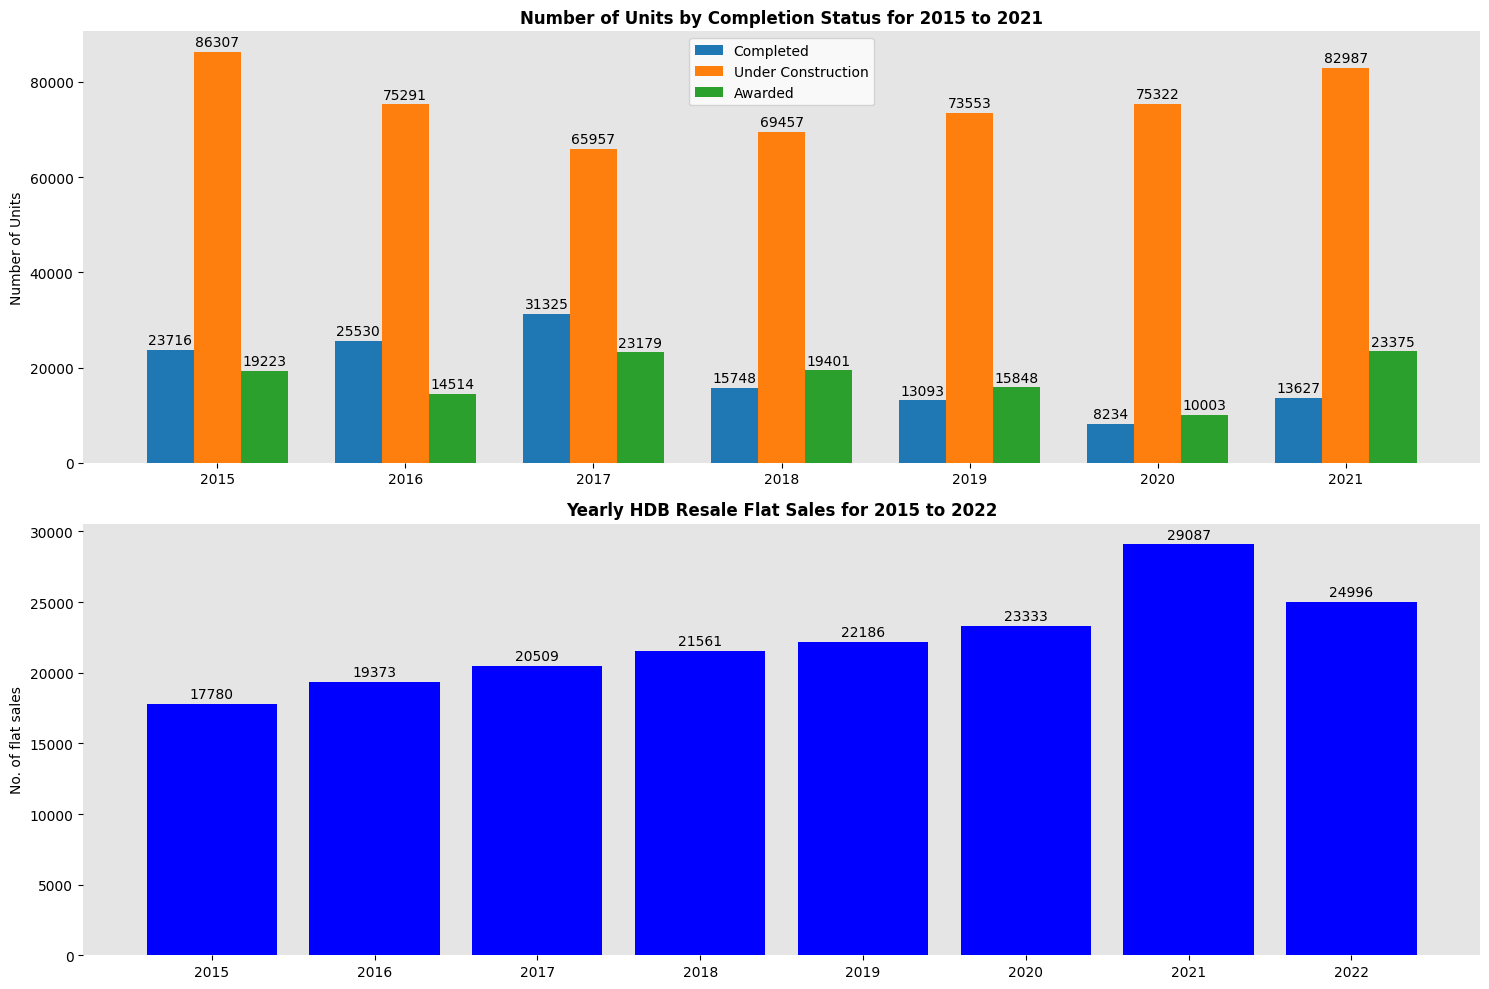

In [14]:
# filter comp_stat for years 2015 to 2021
status = comp_stat[(comp_stat['year'] > 2014) & (comp_stat['type'] == 'HDB Flats')]

# grouped bar charts ordered by completion status
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html
# https://www.geeksforgeeks.org/create-a-grouped-bar-plot-in-matplotlib/

x = np.arange(len(np.unique(status['year']))) # label locations
width = 0.25 # the width of the bars

fig, ax = plt.subplots(2,1, figsize=(15,10))
rects1 = ax[0].bar(x - width, status[status['status'] == 'Completed']['no_of_units'], width, label='Completed')
rects2 = ax[0].bar(x, status[status['status'] == 'Under Construction']['no_of_units'], width, label='Under Construction')
rects3 = ax[0].bar(x + width, status[status['status'] == 'Awarded']['no_of_units'], width, label='Awarded')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[0].set_ylabel('Number of Units', fontsize=10)
ax[0].set_title('Number of Units by Completion Status for 2015 to 2021', fontsize=12, fontweight='bold')
ax[0].set_xticks(x, np.unique(status['year']))
ax[0].legend()

# remove plot borders
ax[0].spines[:].set_visible(False) #use open slice to address all spines
ax[0].set_facecolor('#e5e5e5')

ax[0].bar_label(rects1, padding=2)
ax[0].bar_label(rects2, padding=2)
ax[0].bar_label(rects3, padding=2)

# get unique labels for month and year of sale
labels = list(np.unique(d['year']))
# print(labels)
years = np.arange(0,len(labels))
years_prices = d[['year', 'resale_price']]

# get order of labels based on original array
labels_order = np.unique(d['year'], return_index=True)[1]
labels_ordered = [d['year'][label] for label in sorted(labels_order)]

# create array for bar chart of flat sales per month from 2015 to 2022
prices = years_prices['resale_price']

count_sales = [len(prices[years_prices['year'] == i]) for i in labels_ordered]

year_count_sales = np.array(list(zip(labels_ordered,count_sales))).reshape((len(labels),2))
# print(month_count_sales)

bars = ax[1].bar(year_count_sales[:,0], year_count_sales[:,1].astype(int), color='blue') # prices were saved as str when zipping so need to convert to float
# ax2.tick_params(axis='x', labelrotation = 60)
# ax2.set_yticks(np.arange(0,3100,100))

# remove plot borders
ax[1].spines[:].set_visible(False) #use open slice to address all spines

# add labels
ax[1].bar_label(bars, padding = 2)
ax[1].set_facecolor('#e5e5e5')

ax[1].set_title('Yearly HDB Resale Flat Sales for 2015 to 2022',fontsize=12, fontweight='bold')
ax[1].set_ylabel('No. of flat sales', fontsize = 10)

fig.tight_layout()

plt.show()

We can see from the two visualisations above that the volume of resale flat sales continued rising until 2021 and peaked in 2021, presumably spiking due to the easing of COVID-19 Safe Management Measures.

More pertinently, the number of completed new HDB flats fell in 2020 from 2019 (seen in the upper graph), possibly motivating homebuyers to look to the resale market, contributing to the rise seen in the lower graph. Furthermore, the relative similar numbers of HDB Units under construction from 2019 to 2020 could be attributed to the COVID-19 pandemic imposing pauses on construction due to supply chain disruptions and global economic shortages. This possibly further pushed homebuyers to the resale market in 2021.

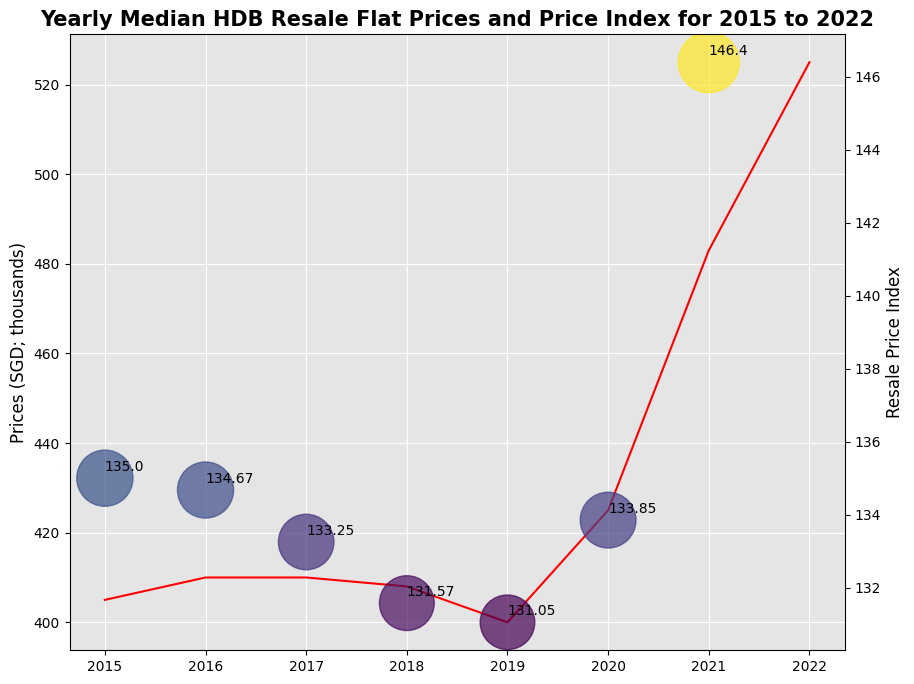

In [15]:
# median price line chart
years_prices = d[['year', 'resale_price']]

# get order of labels based on original array
labels_order = np.unique(d['year'], return_index=True)[1]
labels_ordered = [d['year'][label] for label in sorted(labels_order)]

# create array for line chart of median prices per month from 2015 to 2022
prices = years_prices['resale_price']

prices_median = [np.around(np.median(prices[years_prices['year'] == i])/1000) for i in labels_ordered]

year_prices_median = np.array(list(zip(labels_ordered,prices_median))).reshape((len(labels_ordered),2))
# print(month_prices_median)

# plot
fig, ax1 = plt.subplots(figsize=(10,8))

ax1.plot(year_prices_median[:,0], year_prices_median[:,1].astype(float), color='red') # prices were saved as str when zipping so need to convert to float
# ax.tick_params(axis='x', labelrotation = 90)

# remove plot borders
ax1.spines[:].set_visible(False) #use open slice to address all spines

# add gridlines
ax1.grid(color='w')
ax1.set_facecolor('#e5e5e5')

ax1.set_title('Yearly Median HDB Resale Flat Prices and Price Index for 2015 to 2022',fontsize=15, fontweight='bold')
ax1.set_ylabel('Prices (SGD; thousands)', fontsize = 12)

# resale price index line chart overlayed
rindex = resale_index[resale_index['year'] > 2014]
labels = np.unique(rindex['year'], return_index=True)[1]
labels_index = [rindex['year'][label] for label in sorted(labels)]

index = rindex['index']
mean_index = [np.mean(index[rindex['year'] == i]) for i in labels_index]
year_mean_index = np.array(list(zip(labels_index,mean_index))).reshape((len(labels_index), 2))
colors = year_mean_index[:,1].astype(float)
area = (0.3 * year_mean_index[:,1].astype(float))**2

# to create overlay of scatterplot with secondary y-axis
# https://pythonguides.com/matplotlib-secondary-y-axis/
ax2 = ax1.twinx()
ax2.scatter(year_mean_index[:,0], year_mean_index[:,1].astype(float), s=area, c=colors, alpha=0.7)
ax2.set_ylabel('Resale Price Index', fontsize = 12)

for i in range(len(year_mean_index[:,0])):
    plt.annotate(np.around(year_mean_index[:,1].astype(float)[i],2), (year_mean_index[:,0][i], year_mean_index[:,1].astype(float)[i] + 0.2))

plt.show()

Firstly, the resale price index and line plot of the median HDB resale flat prices show a similar trend where there was a dip in 2019, a slight increase in 2020 and then a sharp rise in 2021, which motivated the first introduction of property cooling measures in December 2021.

The dip in 2019 could be due to [competition from new launches of HDB and private residences](https://www.straitstimes.com/business/property/singapore-private-home-prices-up-05-in-q4-27-for-2019-ura) followed by the subsequent jumps in 2020 and 2021 when the COVID-19 pandemic hit and many wanted to [move out of their family homes as soon as possible](https://www.bbc.com/worklife/article/20220622-the-young-singaporeans-striking-out-on-their-own).

While the overall prices for resale flat prices have not gone down in 2022, compared to recent years, the price trends have gone down earlier in the year (September) than in recent years where the drop would usually only be seen in November or even as late as December, considering it would be the holiday period where the general focus would be on other activities beyond homebuying. Furthermore, with the resale data at it's most updated (as at 8 December 2022), the volume of resale flat sales was already much lower than any month in the past few years.

Taken together with the increases in new HDB flats being awarded since 2019 and the property cooling measures introduced in October 2022, the resale market might moderate even further, as has been [predicted by analysts](https://www.straitstimes.com/business/hdb-resale-prices-should-slow-to-6-8-per-cent-growth-in-2023) recently.

In [29]:
# import dataset

f5 = "/Users/iylia/Library/Mobile Documents/com~apple~CloudDocs/SP/Intro to Programming for DS/CA1/Data/Demand for Rental and Sold Flats/demand-for-rental-and-sold-flats.csv"

demand = np.genfromtxt(f5,
            delimiter=',',
            skip_header=1,
            dtype=[('start_year', 'i8'),
                    ('end_year', 'i8'),
                    ('flat_type', 'U50'),
                    ('demand_for_flats', 'i8')])

demand = demand[demand['flat_type'] == 'home_ownership_flats']

In [16]:
# %reset

# predictions for property market 2023
# https://www.asiaone.com/lifestyle/12-reasons-be-happy-or-scared-about-singapore-property-market-2023
# https://www.straitstimes.com/business/hdb-resale-prices-should-slow-to-6-8-per-cent-growth-in-2023

'''
    - Bookings for new flats (scatterplot) [People who booked flats]
    - Resale price index to compare with median price line chart from first dataset (line chart?)
    - Demand for sold flats [Applicants; do not include resale] (only one number)
    - Number of sold flats (line chart) [include resale]
'''

'\n    - Bookings for new flats (scatterplot) [People who booked flats]\n    - Resale price index to compare with median price line chart from first dataset (line chart?)\n    - Demand for sold flats [Applicants; do not include resale] (only one number)\n    - Number of sold flats (line chart) [include resale]\n'